In [1]:
!pip install python-Levenshtein
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 8.3 MB/s 
     |████████████████████████████████| 2.2 MB 52.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

#Model
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Mounted at /content/drive


# 1. Data Preparation

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/less_close_label/all_features.csv')

In [4]:
df

,business_id,stars,review_count,is_chain,cat_Pizza,cat_Mexican,cat_Chinese,cat_Italian,cat_American (Traditional),cat_Thai,...,sbert_374,sbert_375,sbert_376,sbert_377,sbert_378,sbert_379,sbert_380,sbert_381,sbert_382,sbert_383
0,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,0,0,0,1,0,0,0,...,0.012211,-0.019156,-0.001286,-0.013122,0.053091,0.040040,0.025808,-0.001279,-0.100418,0.011848
1,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,0,0,0,0,0,0,0,...,0.002209,0.018509,0.000142,-0.039370,0.053163,0.067677,0.013563,0.009243,-0.084705,0.038950
2,1Dfx3zM-rW4n-31KeC8sJg,3.0,18,1,0,1,0,0,0,0,...,0.021032,-0.028050,0.027819,-0.003449,0.024819,0.042492,0.022790,0.006833,-0.064094,-0.014117
3,fweCYi8FmbJXHCqLnwuk8w,4.0,16,1,1,0,0,1,0,0,...,0.037612,0.001906,0.021413,0.030010,0.061005,0.052674,-0.022011,0.002378,-0.032968,-0.002928
4,1RHY4K3BD22FK7Cfftn8Mg,4.0,35,0,0,0,0,0,0,0,...,0.020736,-0.018387,-0.008208,-0.044431,0.025959,0.018689,0.025007,0.030810,-0.056356,0.012962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29673,Wyc49dq1r5uMqBl9bHVPAw,2.5,24,1,0,0,0,0,0,0,...,-0.002973,-0.041261,0.011663,-0.033970,0.054499,0.021746,-0.016549,0.004923,-0.057929,0.025338
29674,5xX1Eb4fBoUr53OJkgRHRQ,2.0,121,0,1,0,0,0,0,0,...,0.040455,-0.016426,0.028589,0.007492,0.056014,0.056421,-0.029379,-0.009159,-0.044616,0.012044
29675,RckeGBEPQpGv00ivf6tcgw,4.5,195,0,0,0,0,0,0,0,...,0.006297,-0.006576,0.003291,-0.051857,0.075296,0.032562,-0.007753,0.035036,-0.059841,0.000197
29676,AE80fzfVnsyeHiiVhwSGMw,2.5,93,0,0,0,0,0,0,0,...,0.029704,-0.035346,-0.000777,-0.064983,0.030522,0.035611,0.017997,-0.028465,-0.059596,0.038951


In [5]:
df.isnull().sum().any()

False

In [6]:
X = df.drop(['business_id', 'is_open2020'], axis=1)
y = df['is_open2020']

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
df_minmax_scaled = pd.DataFrame(X_minmax)
df_minmax_scaled

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,0.375,0.014979,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.446081,0.445657,0.550913,0.486198,0.620032,0.494201,0.640693,0.529770,0.233256,0.522292
1,0.750,0.020012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.391086,0.619137,0.558502,0.376946,0.620337,0.615225,0.574298,0.577257,0.301791,0.657305
2,0.500,0.001797,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.494582,0.404691,0.705647,0.526463,0.499913,0.504938,0.624327,0.566378,0.391691,0.392941
3,0.750,0.001558,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.585744,0.542664,0.671590,0.665727,0.653657,0.549524,0.381409,0.546272,0.527455,0.448683
4,0.750,0.003835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.492953,0.449200,0.514111,0.355884,0.504758,0.400707,0.636348,0.674593,0.425441,0.527839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29673,0.375,0.002516,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.362591,0.343848,0.619752,0.399425,0.626014,0.414093,0.411027,0.557760,0.418580,0.589494
29674,0.250,0.014140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.601377,0.458230,0.709742,0.572002,0.632448,0.565935,0.341460,0.494205,0.476647,0.523264
29675,0.875,0.023008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413562,0.503596,0.575244,0.324973,0.714373,0.461457,0.458721,0.693668,0.410242,0.464251
29676,0.375,0.010785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.542264,0.371089,0.553616,0.270339,0.524143,0.474806,0.598339,0.407073,0.411308,0.657306


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 645)

In [11]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [14]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

# 2. Model



## 2.1 Decision Tree



In [15]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
accuracy_score(y_test,y_pred)

0.844115004492363

In [ ]:
confusion_matrix(y_test,y_pred)

array([[  64,  556],
       [ 843, 7441]])

In [ ]:
# draw a tree diagram
feature_names = X.columns
labels = str(y.unique())

plt.figure(figsize=(50,100), facecolor ='k')

a = tree.plot_tree(dtree,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

## 2.2 Random Forest Classification



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.929806828391734

In [ ]:
confusion_matrix(y_test,y_pred)

array([[   1,  619],
       [   6, 8278]])

## 2.3 XGBoost Classification

In [ ]:
xgbt = xgb.XGBClassifier()
xgbt.fit(X_train, y_train)
y_pred = xgbt.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9303683737646001

In [12]:
xgbt = xgb.XGBClassifier()
xgbt.fit(X_train, y_train)
y_pred = xgbt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9303683737646001

In [10]:
confusion_matrix(y_test,y_pred)

array([[   0,  620],
       [   1, 8283]])

# 3. Important Features

Here is the first 25 important features and there importance for each advanced model.

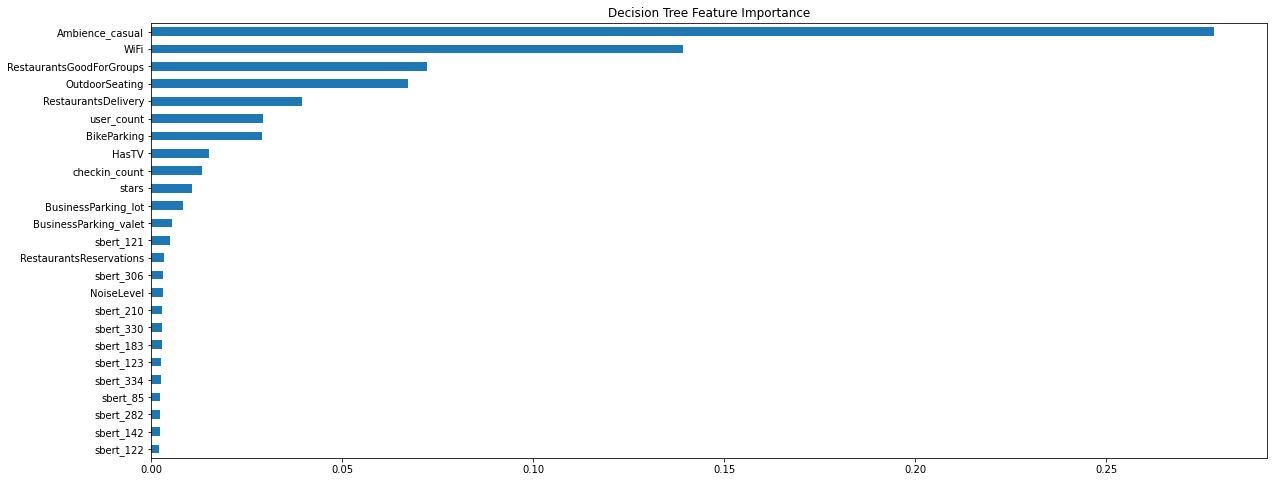

In [ ]:
# Decision Tree
plt.figure(figsize=(20,8))
pd.Series(dtree.feature_importances_, index=X.columns).nlargest(25).sort_values().plot(kind='barh') 
plt.title('Decision Tree Feature Importance')
plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/Advanced Model Results/1.png",format="png",bbox_inches="tight")

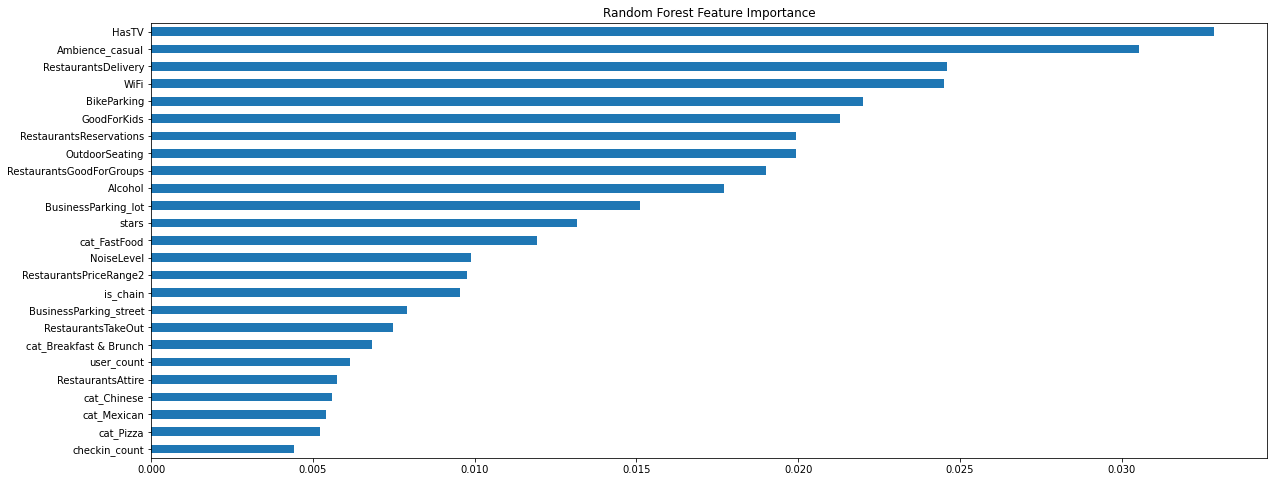

In [ ]:
# Random Forest
plt.figure(figsize=(20,8))
pd.Series(rf.feature_importances_, index=X.columns).nlargest(25).sort_values().plot(kind='barh') 
plt.title('Random Forest Feature Importance')
plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/Advanced Model Results/2.png",format="png",bbox_inches="tight")

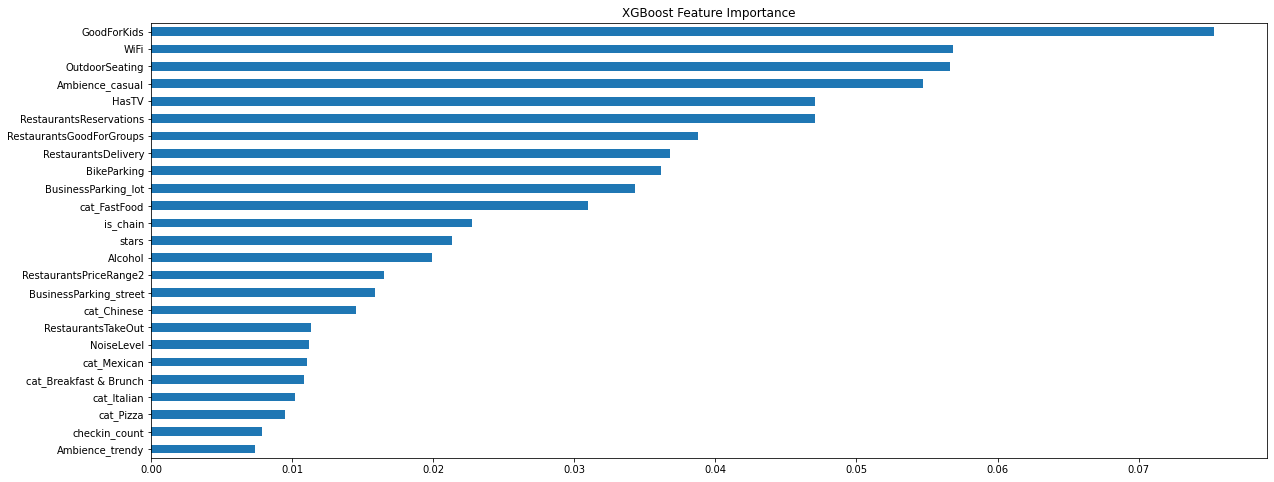

In [ ]:
# XGBoost
plt.figure(figsize=(20,8))
pd.Series(xgbt.feature_importances_, index=X.columns).nlargest(25).sort_values().plot(kind='barh')
plt.title('XGBoost Feature Importance')
plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/Advanced Model Results/3.png",format="png",bbox_inches="tight")